In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('./music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [6]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [7]:
df.drop(columns=['instance_id', 'track_name', 'obtained_date', 'artist_name'], axis=1, inplace=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [8]:
for col in df.columns.difference(['key', 'mode','music_genre']):
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
df[df.columns.difference(['key', 'mode','music_genre'])].astype("float")
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [9]:
key_encoder = LabelEncoder()
df["key"] = key_encoder.fit_transform(df["key"])
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [10]:
mode_encoder = LabelEncoder()
df["mode"] = mode_encoder.fit_transform(df["mode"])
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,Electronic


In [11]:
df = df.drop(df[df["duration_ms"] <= 0].index)
df.reset_index(inplace = True)
df.drop(columns=['music_genre','index'], axis=1, inplace=True)
df['loudness'] = df['loudness'] - df['loudness'].min()
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,40.003,1,0.0300,115.002,0.531
1,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,42.429,0,0.0345,127.994,0.333
2,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,42.548,0,0.2390,128.014,0.270
3,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,40.780,0,0.0413,145.036,0.323
4,47.0,0.00523,0.755,519468.0,0.731,0.85400,5,0.216,36.529,1,0.0412,NaN,0.614


In [12]:
df = df.apply(lambda x: np.log1p(x))
print(df.shape)
df.head()

(45066, 13)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,3.465736,0.012620,0.483660,12.293598,0.636577,0.667829,1.791759,0.116894,3.713645,0.693147,0.029559,4.753607,0.425921
1,3.367296,0.003055,0.482426,12.281245,0.562469,0.011731,2.484907,0.427879,3.771127,0.000000,0.033918,4.859766,0.287432
2,3.555348,0.025083,0.573237,12.025006,0.530628,0.002527,1.609438,0.145830,3.773864,0.000000,0.214305,4.859921,0.239017
3,3.496508,0.004639,0.493476,12.312098,0.461845,0.646580,2.302585,0.145830,3.732418,0.000000,0.040470,4.983853,0.279902
4,3.871201,0.005216,0.562469,13.160562,0.548699,0.617345,1.791759,0.195567,3.625114,0.693147,0.040374,NaN,0.478716


In [13]:
# check missing data
for col in df.columns:
    print(f"{df[col].isnull().values.sum()} missing in {col}")
print("\nOriginal DataFrame shape:", df.shape)
df = df.dropna()
print("New DataFrame shape after dropping missing rows:", df.shape)

# check duplicate df
# print("Duplicated:", df.duplicated().sum())

5 missing in popularity
5 missing in acousticness
5 missing in danceability
5 missing in duration_ms
5 missing in energy
5 missing in instrumentalness
0 missing in key
5 missing in liveness
5 missing in loudness
0 missing in mode
5 missing in speechiness
4506 missing in tempo
5 missing in valence

Original DataFrame shape: (45066, 13)
New DataFrame shape after dropping missing rows: (40560, 13)


In [14]:
df = df.drop(['duration_ms', 'key', 'mode', 'popularity', 'tempo', 'valence', 'instrumentalness', 'speechiness', 'liveness'], axis=1)
df.dtypes

acousticness    float64
danceability    float64
energy          float64
loudness        float64
dtype: object

In [15]:
X_features = df.values
X_features_scaled = StandardScaler().fit_transform(X_features)

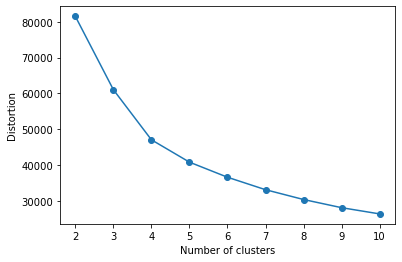

In [16]:
distortions = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [17]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

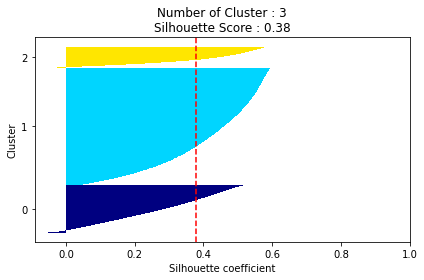

In [18]:
#k = 3
silhouetteViz(3, X_features_scaled)

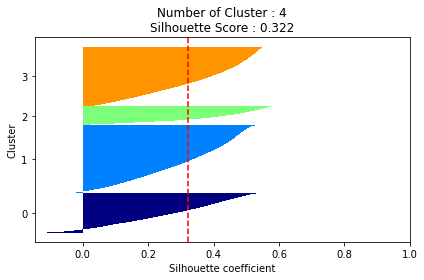

In [19]:
#k = 4
silhouetteViz(4, X_features_scaled)

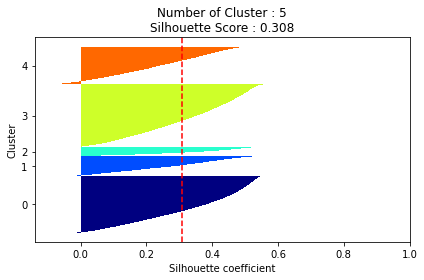

In [20]:
# k = 5
silhouetteViz(5, X_features_scaled)

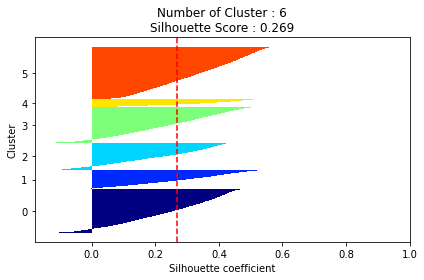

In [21]:
# k = 6
silhouetteViz(6, X_features_scaled)

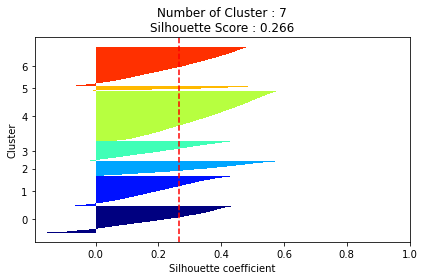

In [22]:
# k = 7
silhouetteViz(7, X_features_scaled)

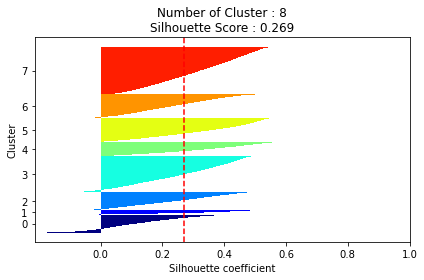

In [23]:
# k = 8
silhouetteViz(8, X_features_scaled)

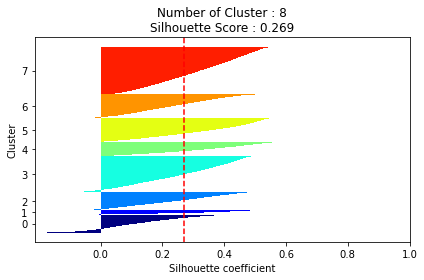

In [24]:
# k = 9
silhouetteViz(8, X_features_scaled)

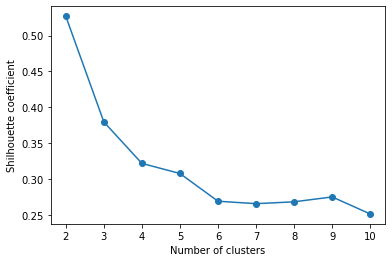

In [25]:
silhouette = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    silhouette_values = silhouette_score(X_features_scaled, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,11), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [26]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

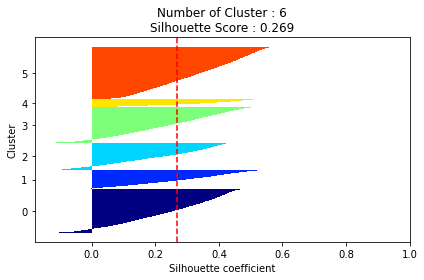

In [27]:
# k = 6
silhouetteViz(6, X_features_scaled)

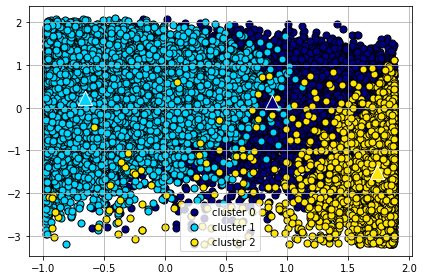

In [28]:
clusterScatter(3, X_features_scaled)

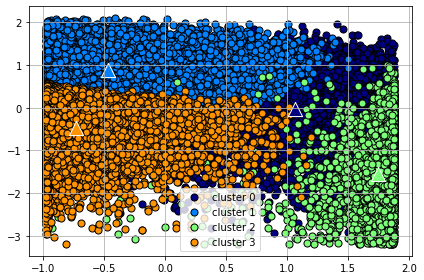

In [29]:
clusterScatter(4, X_features_scaled)

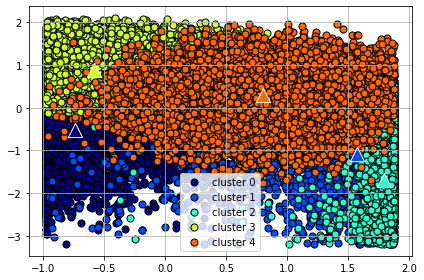

In [30]:
clusterScatter(5, X_features_scaled)

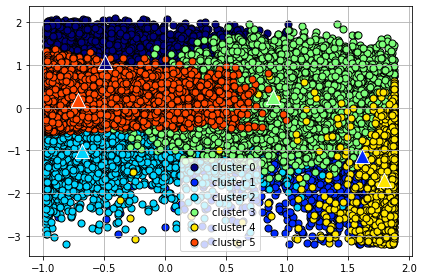

In [31]:
clusterScatter(6, X_features_scaled)

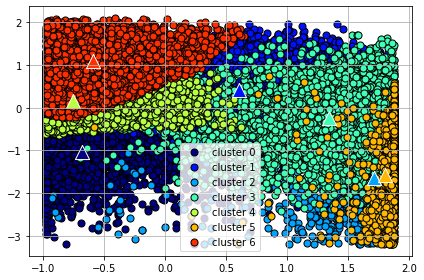

In [32]:
clusterScatter(7, X_features_scaled)

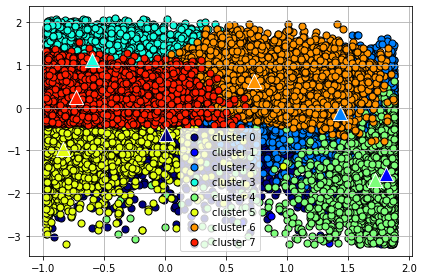

In [33]:
clusterScatter(8, X_features_scaled)

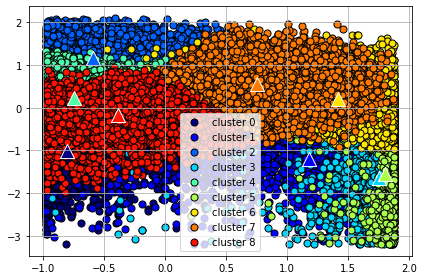

In [34]:
clusterScatter(9, X_features_scaled)